##  NVIDIA Company Current Stock Market Price Predictions

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## import the dataset

In [3]:
dataset=pd.read_csv("NVIDIA Stock Price History.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69%
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33%
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58%
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97%
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15%


In [4]:
# check the dataset type

In [5]:
dataset.shape

(5004, 7)

In [6]:
## check the information of the dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5004 non-null   object 
 1   Price     5004 non-null   float64
 2   Open      5004 non-null   float64
 3   High      5004 non-null   float64
 4   Low       5004 non-null   float64
 5   Vol.      5004 non-null   object 
 6   Change %  5004 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.8+ KB


In [8]:
## check the null values of the dataset

In [9]:
dataset.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Data Preprocessing

In [10]:
## convert the object types columns to  numerical format

In [11]:
dataset['date(MM/DD/YYYY)'] = dataset['Date'].str.replace('/', '').astype(int)
dataset['date(MM/DD/YYYY)'].head()

0     772025
1     732025
2     722025
3     712025
4    6302025
Name: date(MM/DD/YYYY), dtype: int32

In [12]:
## chekck the information of the dataset again

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5004 non-null   object 
 1   Price             5004 non-null   float64
 2   Open              5004 non-null   float64
 3   High              5004 non-null   float64
 4   Low               5004 non-null   float64
 5   Vol.              5004 non-null   object 
 6   Change %          5004 non-null   object 
 7   date(MM/DD/YYYY)  5004 non-null   int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 293.3+ KB


In [14]:
dataset['Change %'].head()

0    -0.69%
1     1.33%
2     2.58%
3    -2.97%
4     0.15%
Name: Change %, dtype: object

In [15]:
dataset['Change %'] = dataset['Change %'].astype(str).str.replace('%', '').astype(float)
dataset['Change %'].head()

0   -0.69
1    1.33
2    2.58
3   -2.97
4    0.15
Name: Change %, dtype: float64

In [16]:
dataset['Vol.'].head()

0    140.14M
1    143.72M
2    171.22M
3    213.14M
4    194.58M
Name: Vol., dtype: object

In [17]:
dataset['Vol.'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5004 entries, 0 to 5003
Series name: Vol.
Non-Null Count  Dtype 
--------------  ----- 
5004 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [18]:
dataset['Vol.'].value_counts()

Vol.
1.09B      14
1.11B      12
1.02B      12
1.14B      12
1.10B      12
           ..
703.51M     1
525.21M     1
747.64M     1
824.31M     1
510.48M     1
Name: count, Length: 4485, dtype: int64

In [19]:
def convert_volume(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
        else:
            return pd.to_numeric(value, errors='coerce')  # for pure numbers
    return value

dataset['Vol'] = dataset['Vol.'].apply(convert_volume)


In [20]:
dataset['Vol'].head()

0    140140000.0
1    143720000.0
2    171220000.0
3    213140000.0
4    194580000.0
Name: Vol, dtype: float64

In [21]:
## Print the dataset

In [22]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,date(MM/DD/YYYY),Vol
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69,772025,140140000.0
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33,732025,143720000.0
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58,722025,171220000.0
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97,712025,213140000.0
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15,6302025,194580000.0


In [23]:
## drop the unnecessary columns  or duplicate columns

In [24]:
dataset_new=dataset.drop(['Date','Vol.'], axis=1)
dataset_new.head()

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.24,158.20,159.31,157.34,-0.69,772025,140140000.0
1,159.34,158.37,160.98,157.77,1.33,732025,143720000.0
2,157.25,152.98,157.60,152.97,2.58,722025,171220000.0
3,153.30,156.29,157.20,151.49,-2.97,712025,213140000.0
4,157.99,158.40,158.66,155.96,0.15,6302025,194580000.0


In [25]:
## Sperate the target column and  independent features

In [26]:
x=dataset_new.drop('Price',axis=1)
x.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.20,159.31,157.34,-0.69,772025,140140000.0
1,158.37,160.98,157.77,1.33,732025,143720000.0
2,152.98,157.60,152.97,2.58,722025,171220000.0
3,156.29,157.20,151.49,-2.97,712025,213140000.0
4,158.40,158.66,155.96,0.15,6302025,194580000.0


In [27]:
y=dataset_new['Price']
y.head()

0    158.24
1    159.34
2    157.25
3    153.30
4    157.99
Name: Price, dtype: float64

In [28]:
## scale the data using StandardScaler
from sklearn.preprocessing  import StandardScaler
std_scaler=StandardScaler()
std_scaled_data=std_scaler.fit_transform(x)
std_scaled_data

array([[ 4.64289089,  4.58865381,  4.7199883 , -0.03087937, -1.05525959,
        -0.93190952],
       [ 4.64835671,  4.64140729,  4.7341003 ,  0.00556343, -1.06540278,
        -0.92380929],
       [ 4.47505794,  4.53463678,  4.57657099,  0.02811468, -1.06793857,
        -0.86158686],
       ...,
       [-0.4422544 , -0.44251162, -0.44237827, -0.01843109, -0.92847631,
        -0.69607518],
       [-0.44193288, -0.44219573, -0.44237827, -0.37925097, -0.93101211,
        -0.47245905],
       [-0.4422544 , -0.44219573, -0.44237827,  0.43259376, -0.9335479 ,
        -0.09396562]])

In [29]:
## convert the scaled data into pandas dataframe
scaled_data_pd=pd.DataFrame(std_scaled_data, columns=x.keys())
scaled_data_pd.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,4.642891,4.588654,4.719988,-0.030879,-1.055260,-0.931910
1,4.648357,4.641407,4.734100,0.005563,-1.065403,-0.923809
2,4.475058,4.534637,4.576571,0.028115,-1.067939,-0.861587
3,4.581481,4.522001,4.527999,-0.072013,-1.070474,-0.766737
4,4.649321,4.568121,4.674699,-0.015725,0.347036,-0.808732


In [95]:
## create the pickle file including scaler object
import pickle 
pickle.dump(std_scaler,open('scaler.pkl','wb'))

## Explotary Data Analysis (EDA)

In [30]:
## Check the correlation
dataset_corr=dataset_new.corr()
dataset_corr

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
Price,1.000000,0.999567,0.999786,0.999832,0.008894,-0.009247,-0.176473
Open,0.999567,1.000000,0.999842,0.999773,0.008325,-0.008672,-0.176166
High,0.999786,0.999842,1.000000,0.999747,0.008306,-0.009540,-0.175391
Low,0.999832,0.999773,0.999747,1.000000,0.008927,-0.008520,-0.177346
Change %,0.008894,0.008325,0.008306,0.008927,1.000000,-0.009798,-0.011353
date(MM/DD/YYYY),-0.009247,-0.008672,-0.009540,-0.008520,-0.009798,1.000000,-0.038931
Vol,-0.176473,-0.176166,-0.175391,-0.177346,-0.011353,-0.038931,1.000000


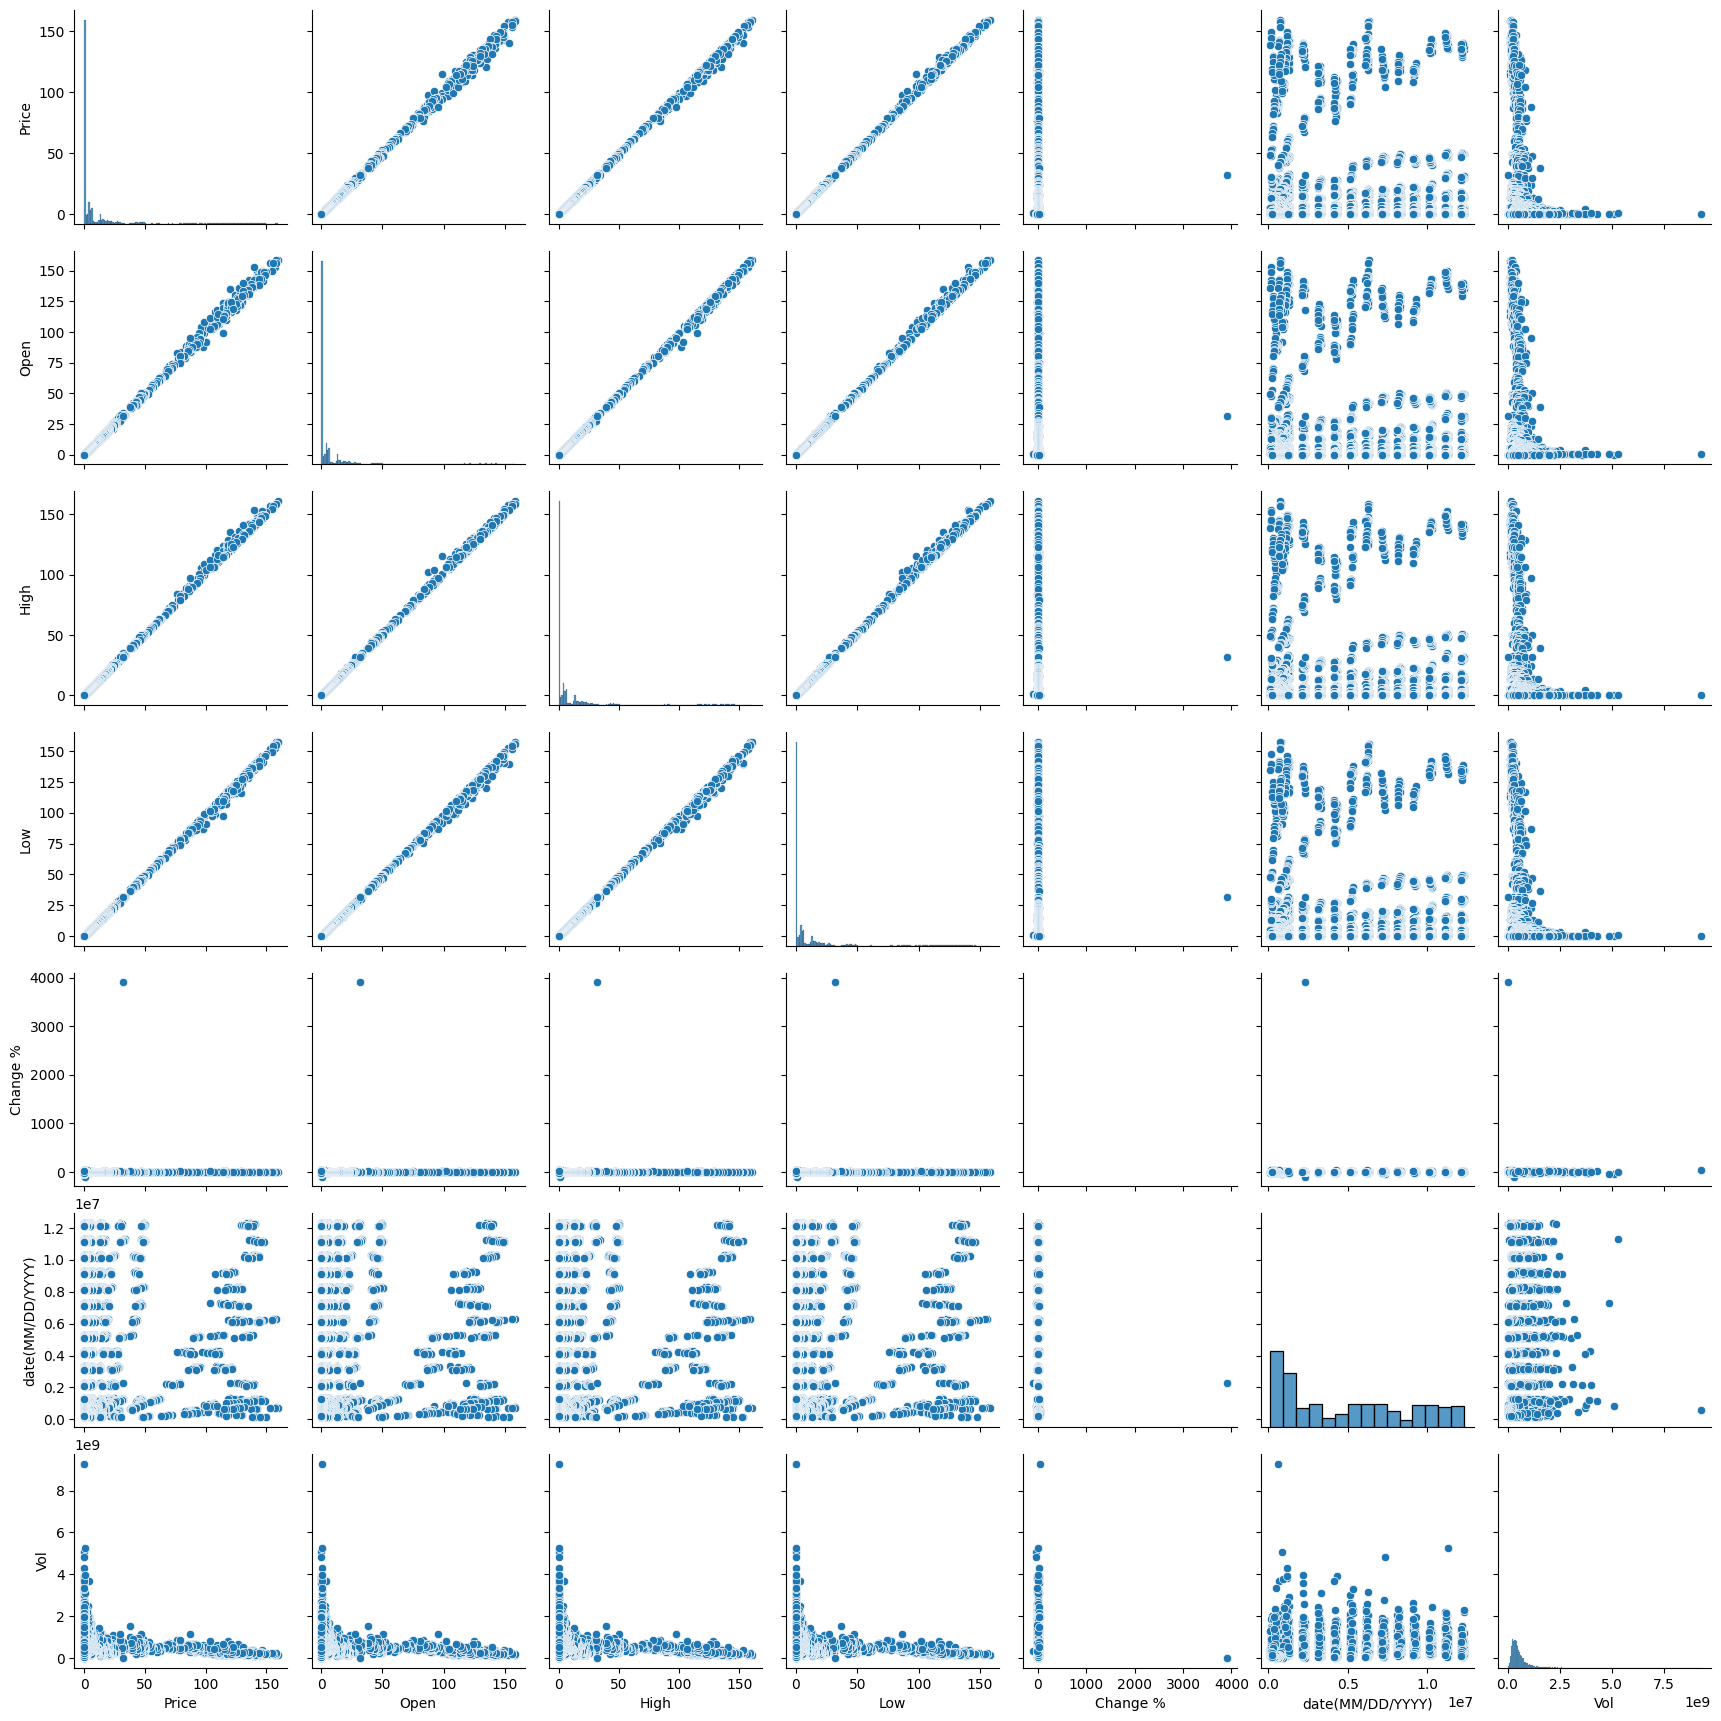

In [31]:
## plot the dataset
sns.pairplot(dataset_new)

In [32]:
## plot the price vs Open in scatterplot

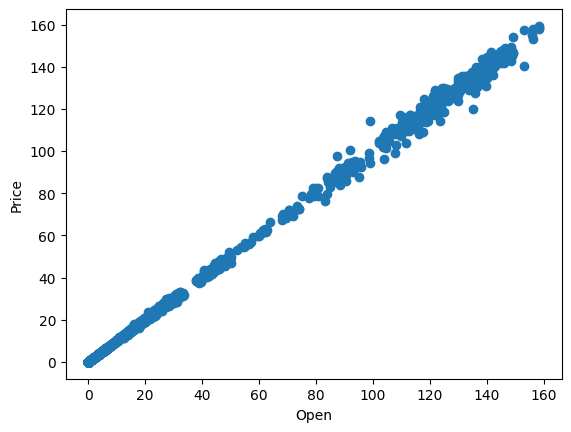

In [33]:
plt.scatter(dataset_new['Open'], dataset_new['Price'])
plt.xlabel('Open')
plt.ylabel('Price')
plt.show()

In [34]:
## Plot the Price vs  High in  scatterplot

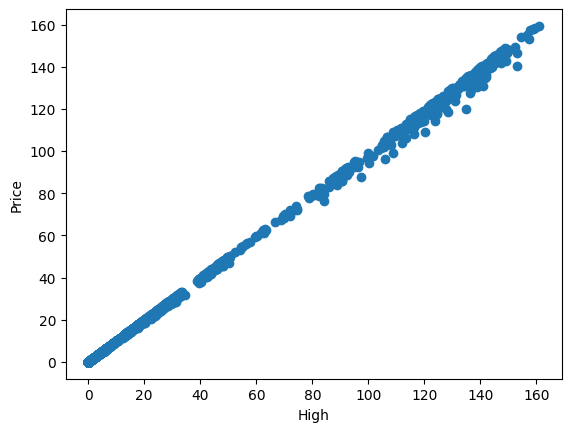

In [35]:
plt.scatter(dataset_new['High'],dataset_new['Price'])
plt.xlabel('High')
plt.ylabel('Price')

plt.show()

In [36]:
## Plot the Price vs Low in scatterplot

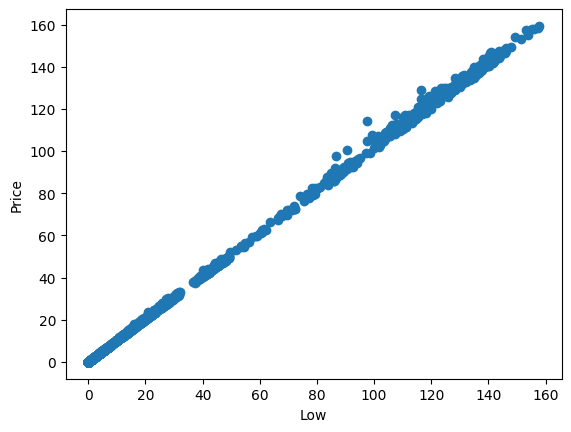

In [37]:
plt.scatter(dataset_new['Low'],dataset_new['Price'])
plt.xlabel('Low')
plt.ylabel('Price')
plt.show()

In [38]:
## Plot the  Price vs Change % in scatterplot

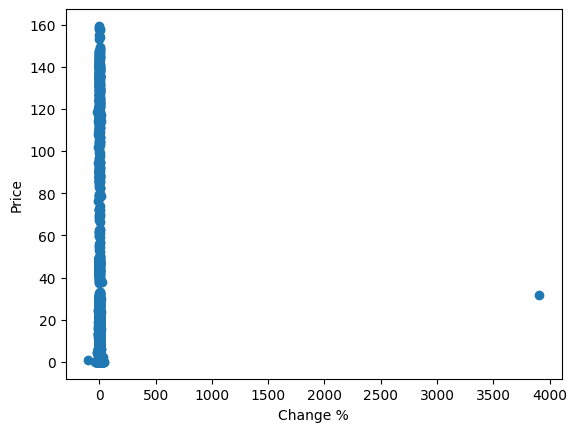

In [39]:
plt.scatter(dataset_new['Change %'],dataset_new['Price'])
plt.xlabel('Change %')
plt.ylabel('Price')
plt.show()

In [40]:
## Plot the  Price vs date(MM/DD/YYYY) in scatterplot

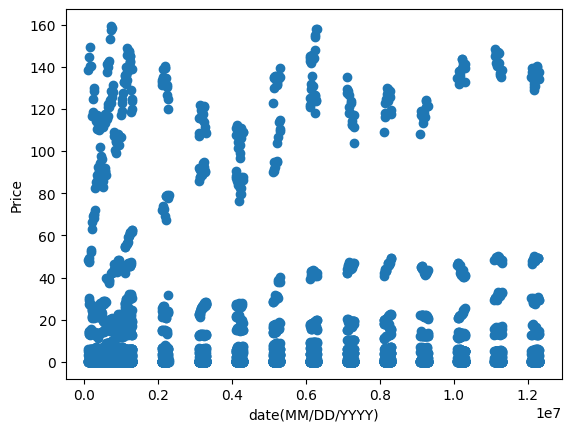

In [41]:
plt.scatter(dataset_new['date(MM/DD/YYYY)'], dataset_new['Price'])
plt.xlabel('date(MM/DD/YYYY)')
plt.ylabel('Price')
plt.show()

In [42]:
## Plot the Price vs Vol in scatterplot

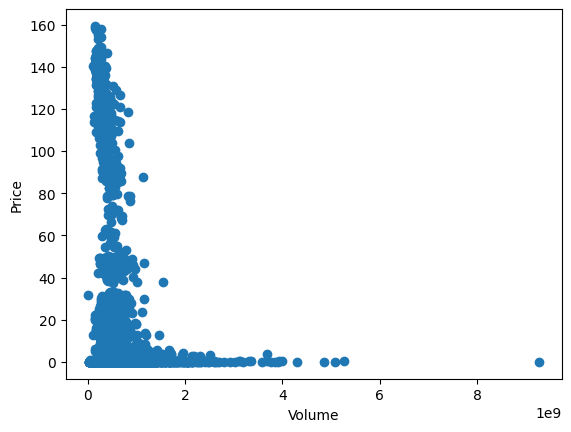

In [43]:
plt.scatter(dataset_new['Vol'],dataset_new['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [44]:
## Regression plot for Price vs Open

<Axes: xlabel='Open', ylabel='Price'>

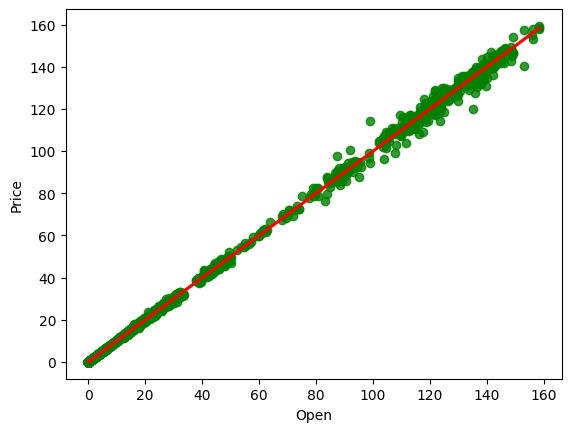

In [45]:
sns.regplot(x="Open",y="Price", data=dataset_new, scatter_kws={'color':'green'}, line_kws={'color':'red'})

In [46]:
## Regression plot for Price vs High

<Axes: xlabel='High', ylabel='Price'>

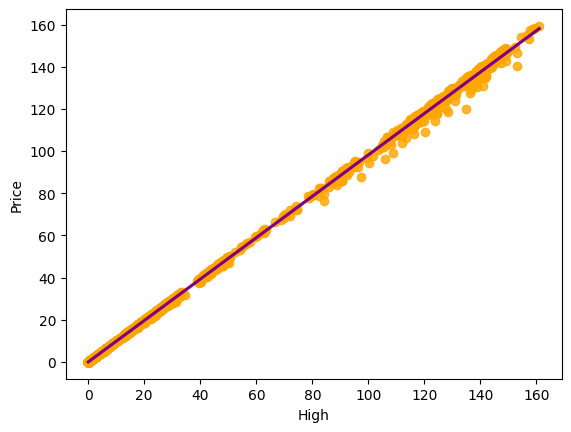

In [47]:
sns.regplot(x='High',y='Price',data=dataset_new, scatter_kws={'color':'orange'}, line_kws={'color':'purple'})

In [48]:
## Regression plot for Price vs Low

<Axes: xlabel='Low', ylabel='Price'>

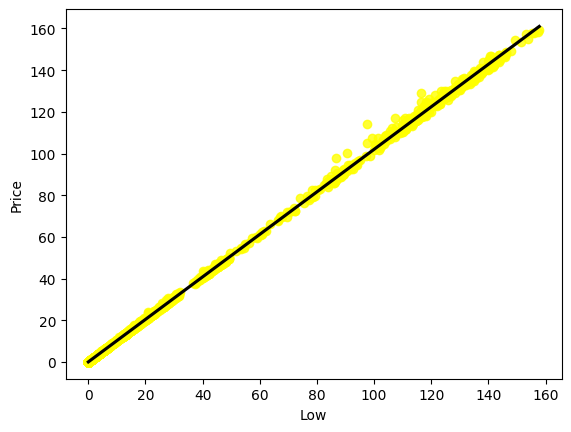

In [49]:
sns.regplot(x='Low',y='Price', data=dataset_new, scatter_kws={'color':'yellow'}, line_kws={'color':'black'})

In [50]:
## Regression plot for Price vs Change %

<Axes: xlabel='Change %', ylabel='Price'>

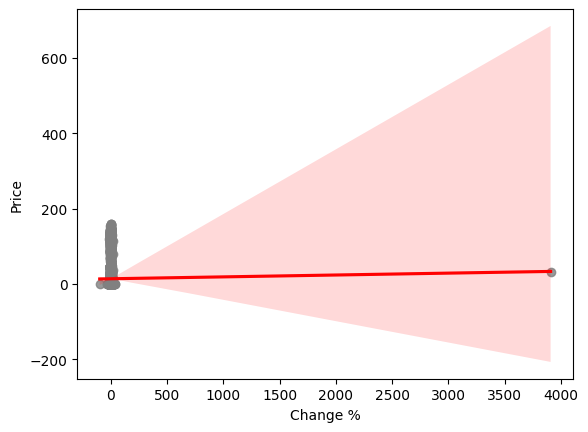

In [51]:
sns.regplot(x='Change %',y='Price', data=dataset_new, scatter_kws={'color':'grey'}, line_kws={'color':'red'})

In [52]:
## Regression plot for Price vs date(MM/DD/YYYY)

<Axes: xlabel='date(MM/DD/YYYY)', ylabel='Price'>

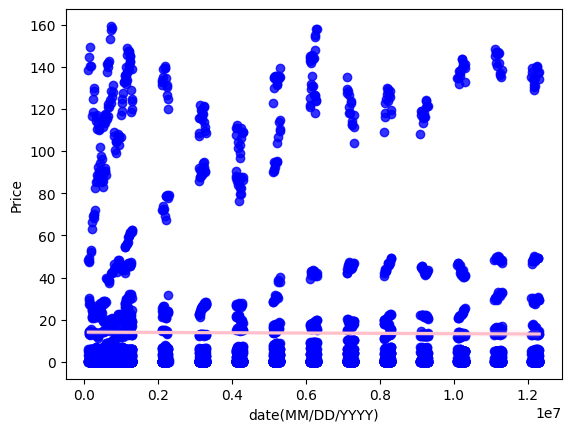

In [53]:
sns.regplot(x='date(MM/DD/YYYY)', y='Price', data=dataset_new,scatter_kws={'color':'blue'}, line_kws={'color':'pink'})

In [54]:
## Regression plot for Price vs Volume

<Axes: xlabel='Vol', ylabel='Price'>

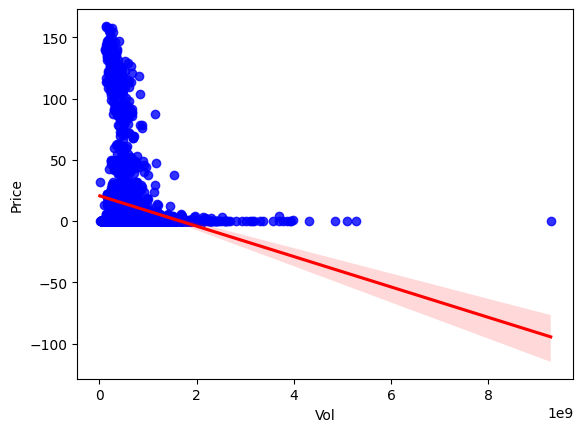

In [55]:
sns.regplot(x='Vol', y='Price', data=dataset_new, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

## Split the dataset into train and test set

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_data_pd,y,test_size=0.1, random_state=42)

In [57]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((4503, 6), (501, 6), (4503,), (501,))

In [58]:
X_train.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
977,0.195318,0.188951,0.200210,0.000873,0.808550,-0.905391
3721,-0.437432,-0.437773,-0.437784,-0.113327,-1.169376,0.592065
4753,-0.440325,-0.440616,-0.440737,-0.018431,-0.946227,-0.842694
135,3.706949,3.713009,3.719677,-0.040441,1.835549,-0.662045
4203,-0.431966,-0.432087,-0.432205,0.033166,-1.141483,1.217276


In [59]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
414,1.026445,1.016264,1.038397,-0.010313,-0.953828,-0.472550
3724,-0.437432,-0.437773,-0.437455,-0.018431,-0.677431,-0.468386
642,0.108186,0.111558,0.113569,-0.036111,-0.923399,-0.196101
1057,0.049027,0.045853,0.047275,-0.040802,-0.185482,-0.492981
1456,-0.298214,-0.300362,-0.298961,-0.030338,1.077345,-0.651569


In [60]:
y_train.head()

977      19.91
3721      0.18
4753      0.09
135     130.39
4203      0.36
Name: Price, dtype: float64

In [61]:
y_test.head()

414     45.96
3724     0.19
642     17.00
1057    15.17
1456     4.50
Name: Price, dtype: float64

## Model Training

In [62]:
## Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [63]:
## Get the  coefficient

In [64]:
print(lr_model.coef_)

[-2.07523807e+01  2.53159028e+01  2.65223216e+01  1.82222936e-03
  3.84960997e-03  4.89488562e-04]


In [65]:
## Get the interceft

In [66]:
print(lr_model.intercept_)

13.795738571695065


## Model Testing

In [67]:
## make the [redictions using X_test data

In [68]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
414,1.026445,1.016264,1.038397,-0.010313,-0.953828,-0.472550
3724,-0.437432,-0.437773,-0.437455,-0.018431,-0.677431,-0.468386
642,0.108186,0.111558,0.113569,-0.036111,-0.923399,-0.196101
1057,0.049027,0.045853,0.047275,-0.040802,-0.185482,-0.492981
1456,-0.298214,-0.300362,-0.298961,-0.030338,1.077345,-0.651569


In [69]:
lr_predictions=lr_model.predict(X_test)
lr_predictions

array([4.57589962e+01, 1.85654540e-01, 1.73831987e+01, 1.51919468e+01,
       4.45509721e+00, 1.23392447e+02, 3.99572010e+00, 1.76528219e+01,
       2.20506731e-01, 2.66449182e+00, 3.51918475e-01, 1.04366085e+02,
       5.35657856e+00, 5.13837239e-01, 1.75841570e-01, 2.69451777e+00,
       3.86373985e-01, 1.86974685e+01, 3.07170563e-01, 1.17783213e-01,
       2.29105207e+01, 6.93473392e-01, 4.77313550e-01, 5.18361927e+01,
       3.51556572e-01, 5.55178853e-01, 3.53053161e-01, 8.87665368e+01,
       2.84558083e+01, 3.58616864e-02, 1.42518006e+01, 6.12970574e+00,
       2.97928119e-01, 4.99137022e-01, 1.13893807e+01, 4.62719186e-01,
       1.53352555e+01, 3.02544600e-01, 5.85068482e-01, 2.63298131e+00,
       4.28773128e+00, 2.41571151e+01, 1.33634655e+02, 1.08393588e+02,
       2.54389492e+00, 1.97881445e-01, 8.98461059e+00, 3.91721029e-01,
       3.02422400e+01, 4.03857824e-01, 1.52937765e+00, 4.79100793e-01,
       7.61318863e-02, 3.64751658e-01, 8.77641271e+00, 3.12859317e-01,
      

In [70]:
y_test

414     45.96
3724     0.19
642     17.00
1057    15.17
1456     4.50
        ...  
2197     1.68
881     30.00
3480     0.21
367     56.05
1210    12.71
Name: Price, Length: 501, dtype: float64

In [71]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
414,1.026445,1.016264,1.038397,-0.010313,-0.953828,-0.472550
3724,-0.437432,-0.437773,-0.437455,-0.018431,-0.677431,-0.468386
642,0.108186,0.111558,0.113569,-0.036111,-0.923399,-0.196101
1057,0.049027,0.045853,0.047275,-0.040802,-0.185482,-0.492981
1456,-0.298214,-0.300362,-0.298961,-0.030338,1.077345,-0.651569


In [72]:
## Plot the predictions vs y_test

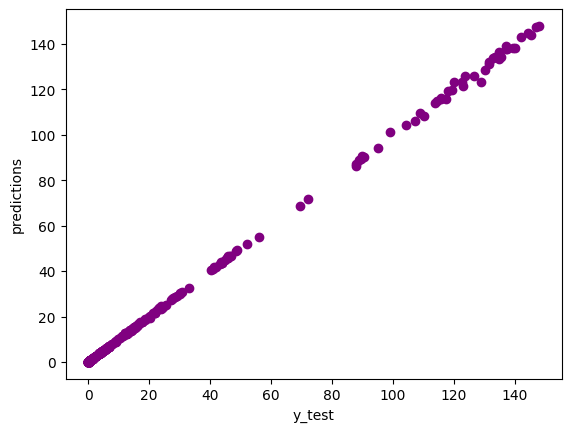

In [73]:
plt.scatter(y_test,lr_predictions, color='purple')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

## Evaluvate the Model Performance

In [74]:
## calculate the model residuals

residuals=y_test-lr_predictions
residuals

414     0.201004
3724    0.004345
642    -0.383199
1057   -0.021947
1456    0.044903
          ...   
2197    0.009325
881     0.196863
3480    0.003132
367     0.847912
1210    0.099632
Name: Price, Length: 501, dtype: float64

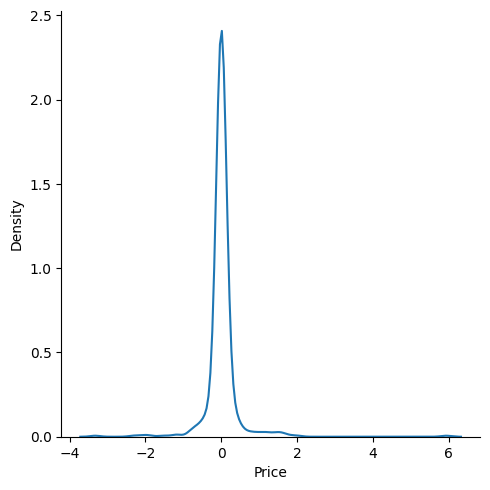

In [75]:
## plot the residuals in the  displot
sns.displot(residuals, kind='kde')

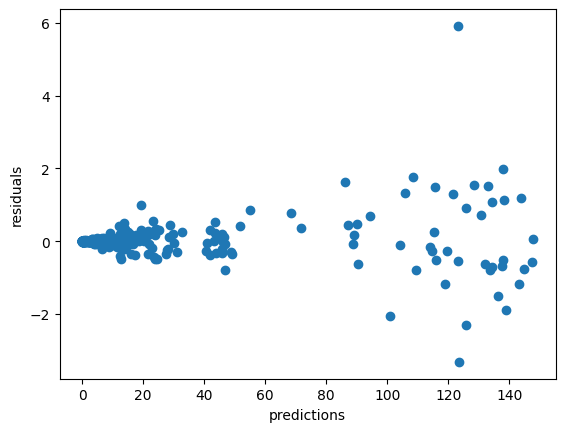

In [76]:
## Plot the residuals vs  predictions
plt.scatter(lr_predictions,residuals)
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

In [77]:
y_test.shape, lr_predictions.shape

((501,), (501,))

In [78]:
## Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lr_predictions)
mse

0.2091678667013947

In [79]:
## Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,lr_predictions)
mae

0.14880845557744332

In [80]:
## Root Mean Squared Error

In [81]:
rmse=np.sqrt(mse)
rmse

0.4573487364160906

In [82]:
## R2 score

In [83]:
from sklearn.metrics import r2_score
r2_score_lr=r2_score(y_test,lr_predictions)
r2_score_lr

0.9998226009936275

## Test the model based on the fresh user enter data

In [92]:
# 158.20,159.31,157.34,0.69,772025,140140000.0
# 145.56,147.96,145.5,2.59,6242025,187570000.0, 
## order of the data enter is Open, High, Low,Change %, Date(MMDDYYYY), Vol	

user_data =[[156.29,157.20,151.49,2.97,712025,213.14*1000000]]
scaled_data=std_scaler.transform(user_data)
print(scaled_data)

[[ 4.58148075  4.52200121  4.52799946  0.03515066 -1.07047437 -0.76673724]]


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
predictions_new=lr_model.predict(scaled_data)
predictions_new[0]
print("Stock market price is ",predictions_new[0])

Stock market price is  153.28627474527323


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Pickling the model

In [96]:
import pickle
pickle.dump(lr_model, open('model.pkl','wb'))